In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
df=pd.read_csv('C:/Users/DELL/DataSets/av_loanprediction/train_ctrUa4K.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
catfeatures=[]
for i in df.columns.tolist():
    if df[i].dtype=='object':
        catfeatures.append(i)
catfeatures 

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [12]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df_new=df.copy()
for i in catfeatures:
    df_new[i]=label.fit_transform(df_new[i])
df_new.head()  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [13]:
df_new.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.023210,0.005776,0.077974,0.028438,0.049772,0.038843,-0.011608,0.049712,-0.004265,-0.018872,-0.197603,0.040306
Gender,-0.023210,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.005776,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.077974,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.028438,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,0.049772,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.038843,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,-0.011608,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.049712,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.004265,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798


In [14]:
df_new=df_new.drop(['Loan_ID'],axis=1)

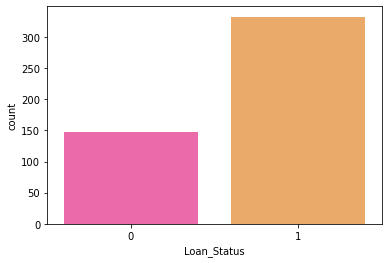

In [15]:
sb.countplot(x=df_new.Loan_Status,palette='spring')
plt.show()

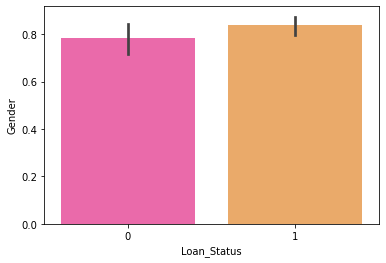

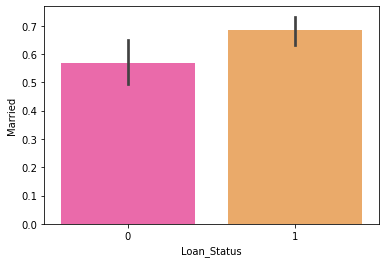

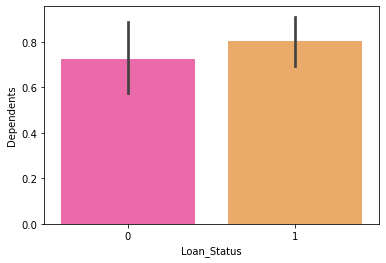

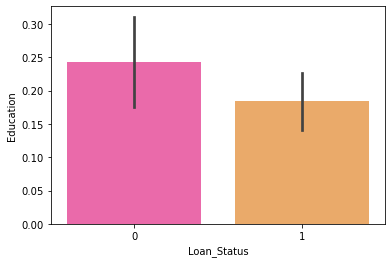

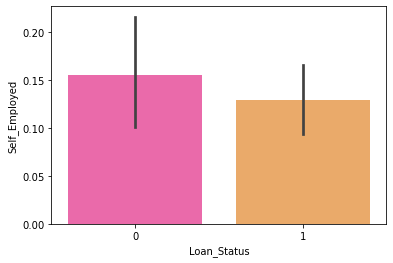

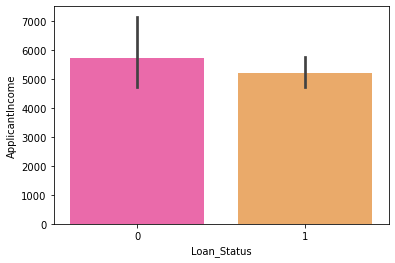

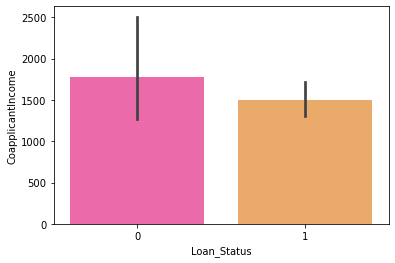

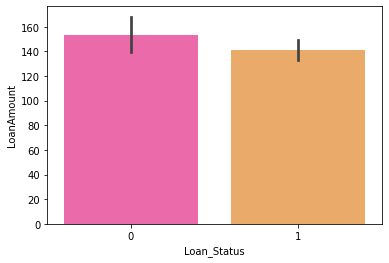

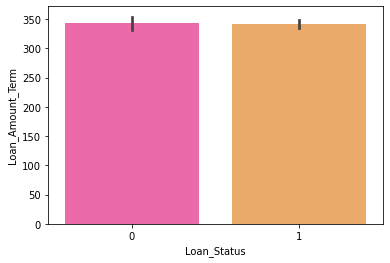

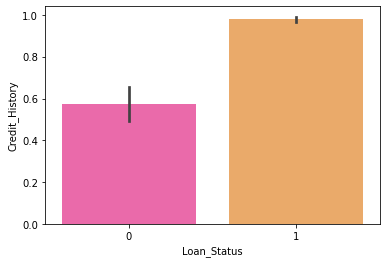

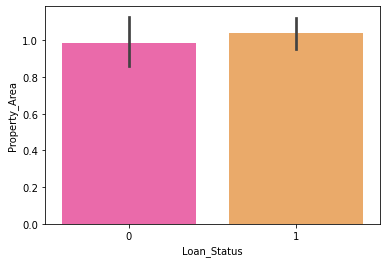

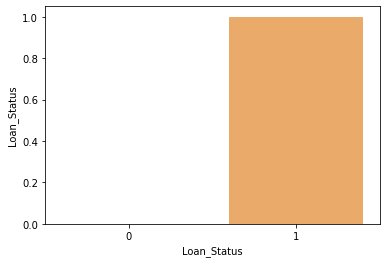

In [16]:
for i in df_new.columns.tolist():
    sb.barplot(x=df_new.Loan_Status,y=df_new[i],palette='spring')
    plt.show()

In [17]:
X=df_new.drop('Loan_Status',axis=1).values
y=df_new['Loan_Status'].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [20]:
logreg=LogisticRegression(C=100,max_iter=100,solver='lbfgs',multi_class='ovr')
dc=DecisionTreeClassifier()
sc=svm.SVC(gamma='scale')

In [21]:
logreg.fit(x_train,y_train)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, multi_class='ovr')

In [22]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
sc.fit(x_train,y_train)

SVC()

In [24]:
ypred=logreg.predict(x_test)
yp=dc.predict(x_test)
yp1=sc.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [26]:
cm=confusion_matrix(y_test,ypred)
print(cm)
cm1=confusion_matrix(y_test,yp)
print(cm1)
cm2=confusion_matrix(y_test,yp1)
print(cm2)

[[ 13  24]
 [  1 106]]
[[17 20]
 [18 89]]
[[  0  37]
 [  0 107]]


In [27]:
acc=accuracy_score(y_test,ypred)
print(acc)
acc1=accuracy_score(y_test,yp)
print(acc1)
acc2=accuracy_score(y_test,yp1)
print(acc2)

0.8263888888888888
0.7361111111111112
0.7430555555555556
